In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

#### Importa o DataFrame disponibilizado pela Imersão Online da Alura

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

##### Verifica os dados do DataFrame para limpeza e manipulação dos dados

In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


#### Verifica valores null no DataFrame

In [30]:
df.isnull().any(axis=0)

work_year              True
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [31]:
df['work_year'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [32]:
df[df.isnull().any(axis=1)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


##### Por ser poucos registros, optou-se por excluir os registros, ao invés de altera-los

In [33]:
df_final = df.dropna()

In [34]:
df_final.isnull().any(axis=0)

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [35]:
df_final.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

###### Altera a coluna work_year de float para int

In [36]:
df_final = df_final.assign(work_year = df_final['work_year'].astype('int64'))

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133339 non-null  int64 
 1   experience_level    133339 non-null  object
 2   employment_type     133339 non-null  object
 3   job_title           133339 non-null  object
 4   salary              133339 non-null  int64 
 5   salary_currency     133339 non-null  object
 6   salary_in_usd       133339 non-null  int64 
 7   employee_residence  133339 non-null  object
 8   remote_ratio        133339 non-null  int64 
 9   company_location    133339 non-null  object
 10  company_size        133339 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.2+ MB


In [38]:
df_final.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


#### Traduz as colunas e categorias para o Português-BR para facilitar a leitura

In [39]:
new_column_names = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'modalidade',
    'company_location': 'local_empresa',
    'company_size': 'porte_empresa'
}

df_final.rename(columns = new_column_names, inplace = True)

df_final.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,modalidade,local_empresa,porte_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


###### Verifica as categorias que estão dificultando a leitura

###### Tipos de senioridade

In [40]:
df_final['senioridade'].value_counts()

senioridade
SE    77236
MI    40462
EN    12441
EX     3200
Name: count, dtype: int64

In [41]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}

df_final['senioridade'] = df_final['senioridade'].replace(senioridade)

df_final['senioridade'].value_counts()

senioridade
senior       77236
pleno        40462
junior       12441
executivo     3200
Name: count, dtype: int64

###### Tipos de contratos

In [42]:
df_final['contrato'].value_counts()

contrato
FT    132553
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [43]:
contrato = {
    'FT': 'integral',
    'CT': 'parcial',
    'PT': 'temporario',
    'FL': 'freelancer'
}

df_final['contrato'] = df_final['contrato'].replace(contrato)

df_final['contrato'].value_counts()

contrato
integral      132553
parcial          394
temporario       376
freelancer        16
Name: count, dtype: int64

###### Modalidade

In [44]:
df_final['modalidade'].value_counts()

modalidade
0      105305
100     27716
50        318
Name: count, dtype: int64

In [45]:
modalidade = {
    0: 'presencial',
    50: 'hibrido',
    100: 'remoto'
}

df_final['modalidade'] = df_final['modalidade'].replace(modalidade)
df_final['modalidade'].value_counts()

modalidade
presencial    105305
remoto         27716
hibrido          318
Name: count, dtype: int64

###### Tamanho da empresa

In [46]:
df_final['porte_empresa'].value_counts()

porte_empresa
M    129554
L      3571
S       214
Name: count, dtype: int64

In [47]:
porte_empresa = {
    'M': 'média',
    'L': 'grande',
    'S': 'pequena'
}

df_final['porte_empresa'] = df_final['porte_empresa'].replace(porte_empresa)
df_final['porte_empresa'].value_counts()

porte_empresa
média      129554
grande       3571
pequena       214
Name: count, dtype: int64

In [48]:
df_final.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,modalidade,local_empresa,porte_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,média
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,média
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,média
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,média
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,média


#### Gráficos de teste

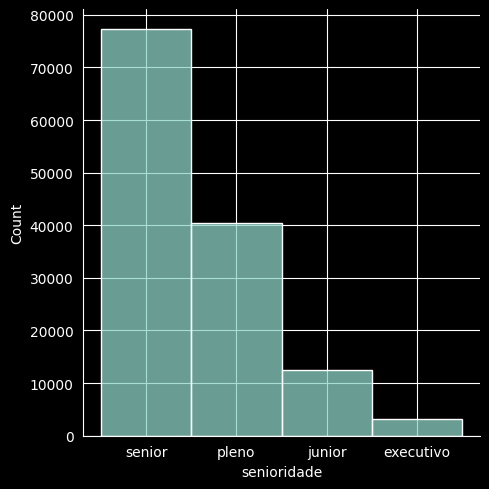

In [52]:
sns.displot(data=df_final, x=df_final['senioridade'])

<Axes: xlabel='ano', ylabel='count'>

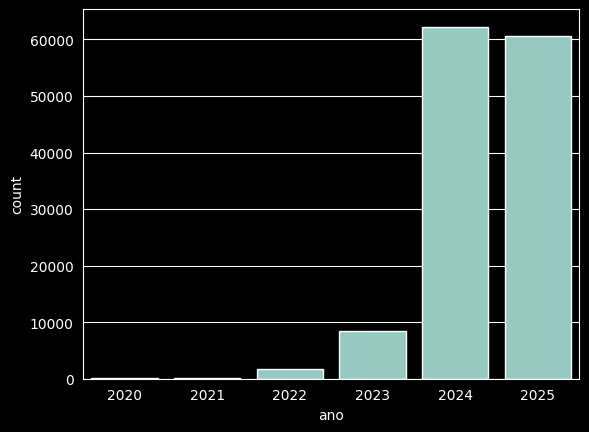

In [118]:
sns.countplot(data=df_final, x='ano')

<Axes: xlabel='ano', ylabel='salario_usd'>

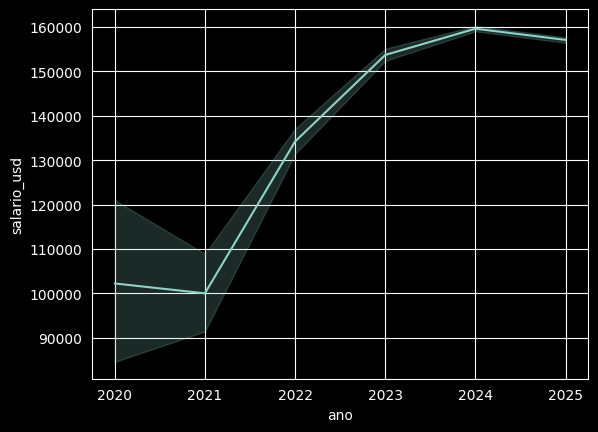

In [59]:
sns.lineplot(data=df_final, x='ano', y='salario_usd')

<Axes: xlabel='salario_usd', ylabel='cargo'>

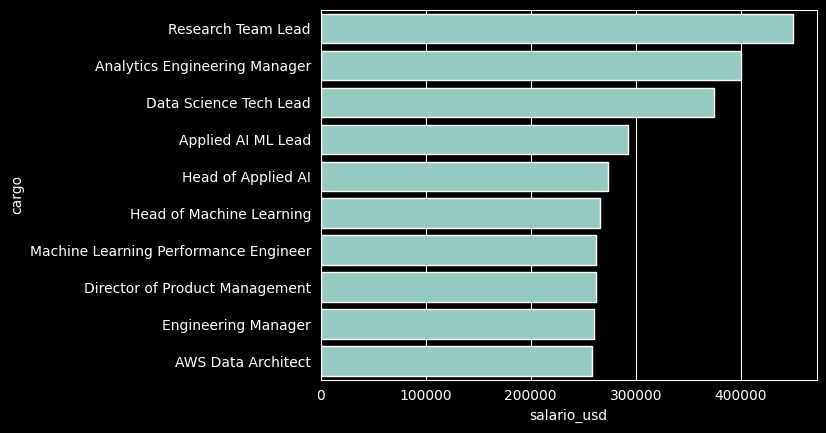

In [60]:
top_job = df_final.groupby('cargo')['salario_usd'].mean().nlargest(10).sort_values(ascending=False).reset_index()

sns.barplot(data= top_job, x='salario_usd', y='cargo')

<Axes: xlabel='salario_usd', ylabel='Count'>

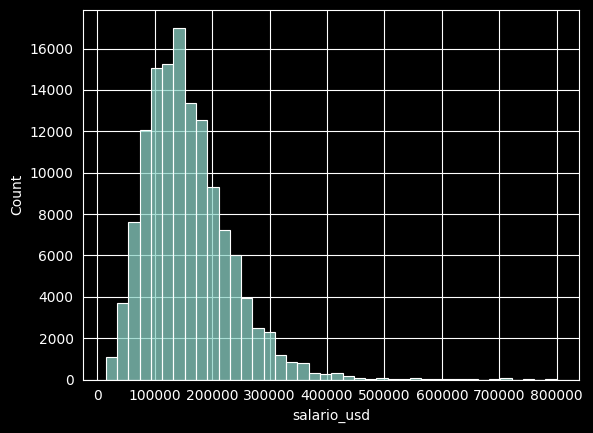

In [61]:
sns.histplot(data=df_final, x='salario_usd', bins=40)

In [117]:
df_final['residencia'].value_counts().head(10)

residencia
US    119572
CA      5238
GB      3711
AU       517
NL       404
DE       384
FR       369
LT       338
AT       297
ES       265
Name: count, dtype: int64

In [62]:
import pycountry

def iso3_converter(country):
    try:
        return pycountry.countries.get(alpha_2=country).alpha_3
    except:
        return None

In [63]:
df_final['residencia_iso3'] = df_final['residencia'].apply(iso3_converter)

In [80]:
df_final_data_scientist = df_final[df_final['cargo'] == "Data Scientist"]
df_final_mean_countries = df_final_data_scientist.groupby('residencia_iso3')['salario_usd'].mean().reset_index()

px.choropleth(
    df_final_mean_countries,
    locations='residencia_iso3',
    color='salario_usd'
    )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'residencia_iso3=%{location}<br>salario_usd=%{z}<extra></extra>',
              'locations': array(['AND', 'ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL',
                                  'CYP', 'DEU', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
                                  'GBR', 'GRC', 'HKG', 'HUN', 'IND', 'IRL', 'ITA', 'JPN', 'KEN', 'KOR',
                                  'LTU', 'LVA', 'MEX', 'NGA', 'NLD', 'NOR', 'NZL', 'PAK', 'PHL', 'POL',
                                  'PRT', 'ROU', 'RUS', 'SGP', 'SRB', 'SVK', 'SWE', 'THA', 'TUR', 'TWN',
                                  'UKR', 'USA', 'UZB', 'ZAF'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': {'bdata': ('AAAAACDH6EAAAAAAAILkQAAAAADgY/' ... 'Ly9JPfA0EAAAAAgNLxQAAAAAD46OVA'),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'salario_usd'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...'}
})

<Axes: xlabel='modalidade', ylabel='count'>

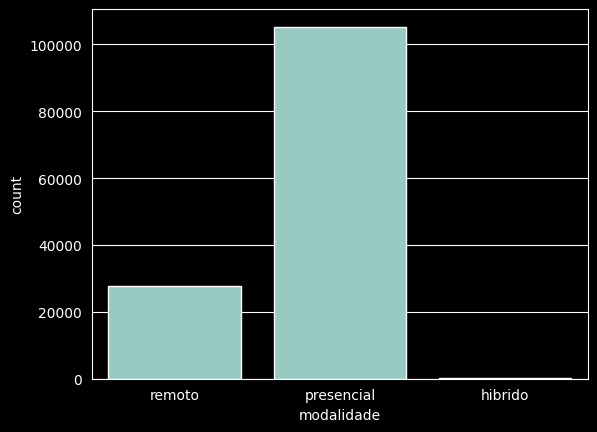

In [119]:
sns.countplot(data=df_final, x='modalidade')

In [123]:
remote_ratio = df_final['modalidade'].value_counts().reset_index()
remote_ratio.columns = ['modalidade', 'quantidade']

px.pie(data_frame=remote_ratio, values='quantidade', names='modalidade')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'modalidade=%{label}<br>quantidade=%{value}<extra></extra>',
              'labels': array(['presencial', 'remoto', 'hibrido'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': 'WZsBAERsAAA+AQAA', 'dtype': 'i4'}}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [126]:
df_final.to_csv('df_final.csv', index_label=False)

In [125]:
df_final.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_usd,residencia,modalidade,local_empresa,porte_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,média,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,média,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,média,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,média,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,média,USA
